In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'test.csv'
test = pd.read_csv(path + trainfile)
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)

In [2]:
print train.shape
train.head()

(3749528, 8)


label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  
0               1                 1  
1               1                 2  
2               4                 1  
3               1                 1  
4               1                 1

In [3]:
test.drop('instanceID', axis=1, inplace=True)
train = pd.concat([train, test])

In [4]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    # means = train.groupby(var)['date'].mean()
    group = train.groupby('date')[var]
    means = group.mean()
    std = group.std()
    # 根据var属性的每一个取值做均值     
    fig = plt.figure()
    plt.scatter(x=means.index, y = means.values)
    fig = plt.figure()
    plt.scatter(x=std.index, y = std.values)
    # 按顺序画散点图
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    # 方差存储的是不同天的var属性的方差，std.std()     
    return (var, len(train[var].value_counts()),std.max()-std.min(), std.std(), sort_means.max() - sort_means.min(), sort_means.std())

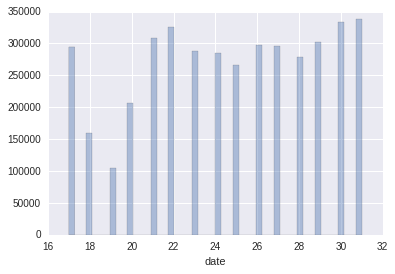

In [5]:
# 测试集只有一天
var = 'date'
train[var] = (train['clickTime'].values) / 10000
# test[var] = property(var, train)
sns.distplot(train[var], kde=False)

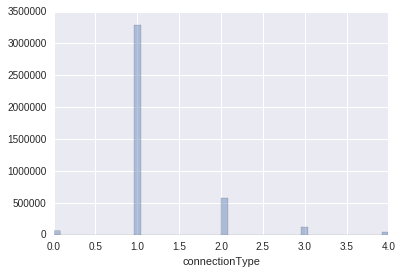

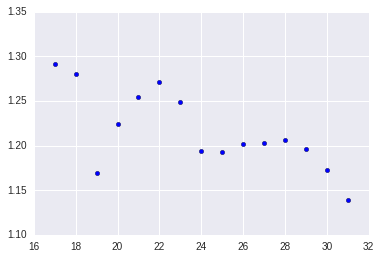

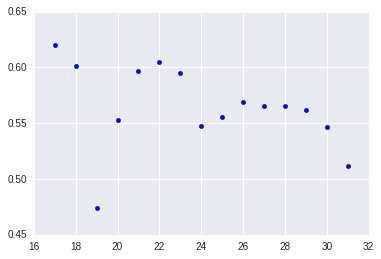

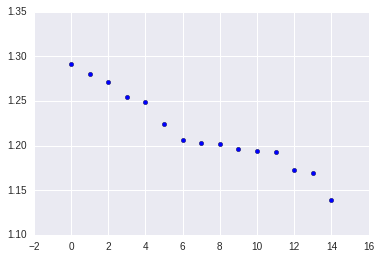

In [6]:
var = 'connectionType'
test[var] = property(var, train)

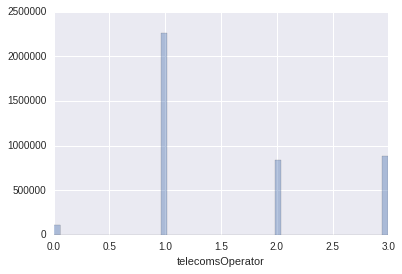

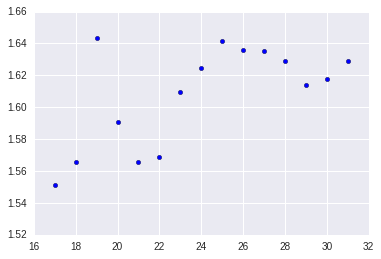

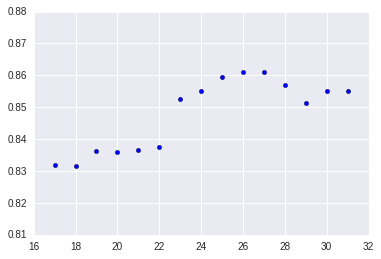

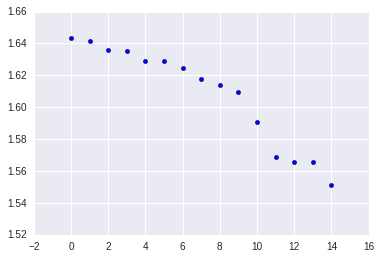

In [7]:
var = 'telecomsOperator'
test[var] = property(var, train)

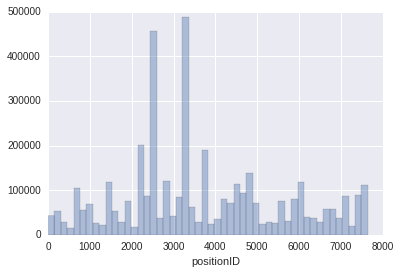

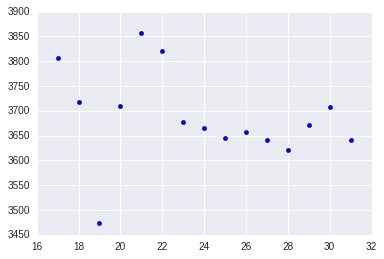

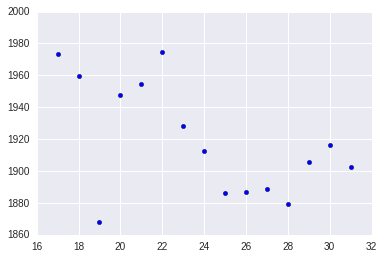

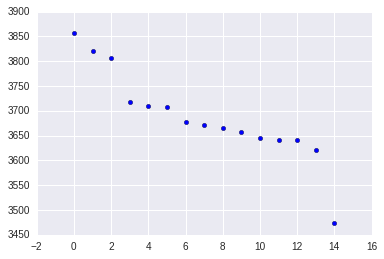

In [8]:
var = 'positionID'
test[var] = property(var, train)

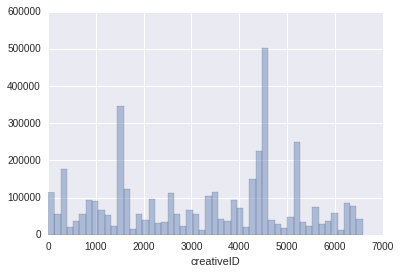

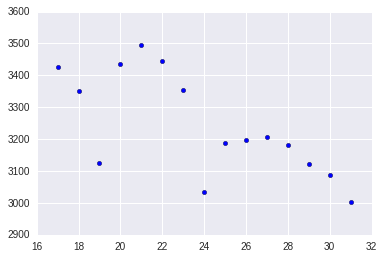

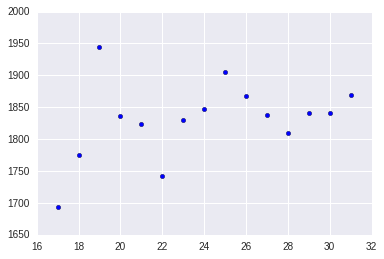

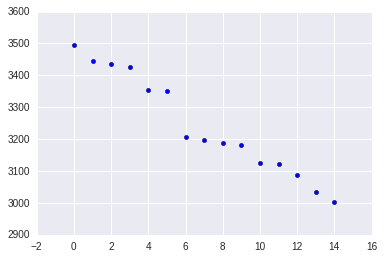

In [9]:
var = 'creativeID'
test[var] = property(var, train)

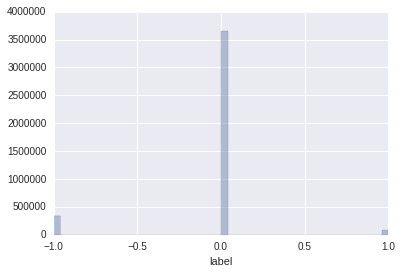

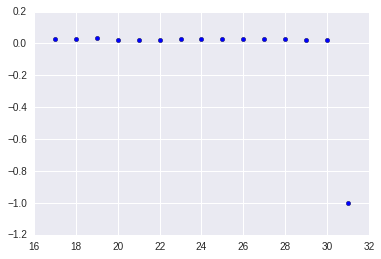

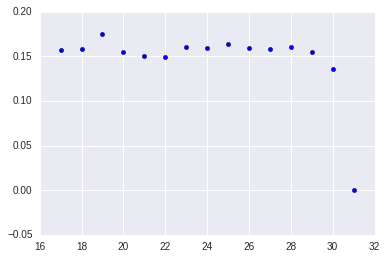

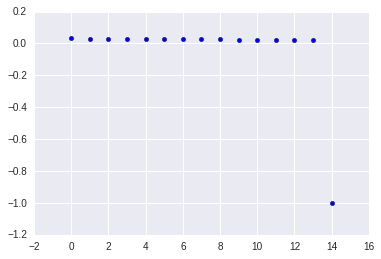

In [10]:
var = 'label'
test[var] = property(var, train)

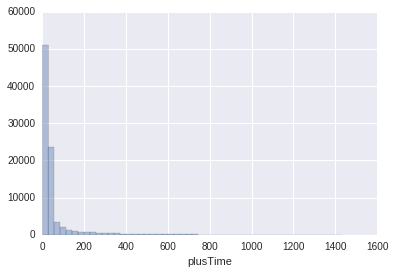

In [11]:
# 把时间转换为以分钟为单位
def returnmin(time):
    clickT = time % 10000
    clickT = clickT.values  / 100 * 60 + clickT.values % 100
    return clickT
clickTiMin = returnmin(train['clickTime'])
converTiMin = returnmin(train['conversionTime'])
# type(clickTiMin)
train['clickTiMin'] = clickTiMin
train['converTiMin'] = converTiMin
dfTime = pd.DataFrame({'clickTiMin':clickTiMin, 'converTiMin':converTiMin})
dfTime = dfTime.fillna(0)
train['plusTime'] = dfTime['converTiMin'] - dfTime['clickTiMin']
# dfTime[dfTime['plusTime'] > 0]['plusTime'] = 0
# fig =plt.figfure()
v = train[train['plusTime'] > 0]
# 激活的conversionTime与clickTime的时间差
sns.distplot(v['plusTime'],kde=False)

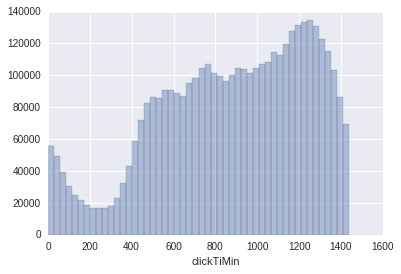

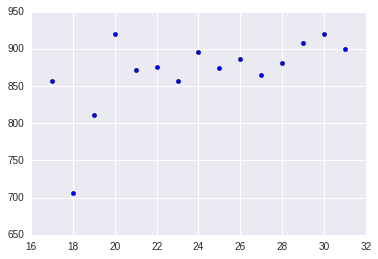

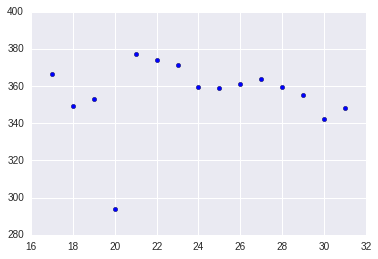

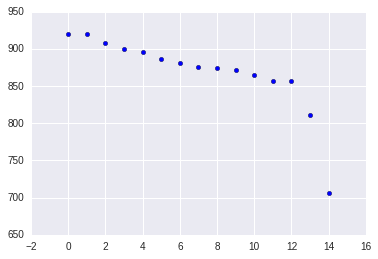

In [12]:
# 点击时间分布
var = 'clickTiMin'
test[var] = property(var, train)

In [13]:
for (k,v) in test.items():
    print v

('positionID', 7645, 106.97647621990404, 35.576268409385065, 382.40291131460754, 92.693379949555265)
('connectionType', 5, 0.14568653042126284, 0.037605513744043459, 0.15245051575132074, 0.044163450814547242)
('label', 3, 0.17479481588104293, 0.041327398835030379, 1.0315482248123045, 0.26474692097034863)
('clickTiMin', 1440, 83.18100617107649, 19.631545590520968, 214.62836245064807, 52.951491528340156)
('creativeID', 6582, 250.26245709442151, 60.943071486888748, 493.23227366510127, 161.33543535609374)
('telecomsOperator', 4, 0.029276893177367924, 0.01125894215037267, 0.092537613721402456, 0.031421946512779547)


clickTime  connectionType  conversionTime  creativeID  \
clickTime          1.000000       -0.062561        0.991996   -0.068433   
connectionType    -0.062561        1.000000       -0.047888    0.016981   
conversionTime     0.991996       -0.047888        1.000000   -0.041186   
creativeID        -0.068433        0.016981       -0.041186    1.000000   
label             -0.401334        0.016737             NaN    0.027000   
positionID        -0.020317        0.084207        0.000183    0.043255   
telecomsOperator   0.025132       -0.068290        0.010187   -0.024275   
userID             0.002654       -0.001860        0.004742   -0.000790   
date               0.999901       -0.062350        0.991797   -0.068447   
clickTiMin         0.078672       -0.019386        0.067367   -0.003897   
converTiMin        0.035243        0.014629        0.016963    0.074931   
plusTime          -0.036253        0.001350       -0.075957   -0.002948   

                     label  positionID  telecomsOperator    userID      date  \
clickTime        -0.401334   -0.020317          0.025132  0.002654  0.999901   
connectionType    0.016737    0.084207         -0.068290 -0.001860 -0.062350   
conversionTime         NaN    0.000183          0.010187  0.004742  0.991797   
creativeID        0.027000    0.043255         -0.024275 -0.000790 -0.068447   
label             1.000000   -0.002347         -0.001728 -0.001609 -0.401461   
positionID       -0.002347    1.000000         -0.026136  0.000027 -0.020618   
telecomsOperator -0.001728   -0.026136          1.000000 -0.001005  0.025019   
userID           -0.001609    0.000027         -0.001005  1.000000  0.002622   
date             -0.401461   -0.020618          0.025019  0.002622  1.000000   
clickTiMin       -0.019838    0.019708          0.009733  0.002511  0.064630   
converTiMin            NaN    0.049735         -0.009089  0.000557  0.023480   
plusTime          0.099808   -0.023270         -0.006347 -0.002688 -0.023811   

                  clickTiMin  converTiMin  plusTime  
clickTime           0.078672     0.035243 -0.036253  
connectionType     -0.019386     0.014629  0.001350  
conversionTime      0.067367     0.016963 -0.075957  
creativeID         -0.003897     0.074931 -0.002948  
label              -0.019838          NaN  0.099808  
positionID          0.019708     0.049735 -0.023270  
telecomsOperator    0.009733    -0.009089 -0.006347  
userID              0.002511     0.000557 -0.002688  
date                0.064630     0.023480 -0.023811  
clickTiMin          1.000000     0.773282 -0.883585  
converTiMin         0.773282     1.000000  0.312836  
plusTime           -0.883585     0.312836  1.000000

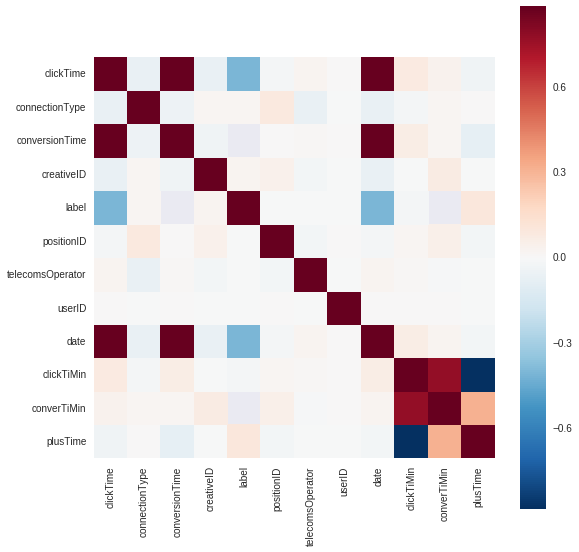

In [14]:
corrmat =  train.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)
corrmat